In [51]:
import pandas as pd
import matplotlib as plt
import numpy as np
housing = pd.read_csv("housingtrain.csv")
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Went through the initial 81 columns and found variables that I could tell were either categorical or numerical. And so below we redefine our DataFrame.

In [52]:
numerical = [
    'SalePrice', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr','GrLivArea'
]

categorical = [
    'MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'SaleCondition', 'MoSold', 'YrSold'
]
housing = housing[numerical + categorical]
housing.shape

(1460, 15)

From housin.shape, we can see that our DataFrame now only has 14 columns. Now onward to analysis :)

# Analyzing Numerical Variables

## Our Object of interest is to understand how the variables in this dataset relate to the sale price of the house

In [53]:
import seaborn as sns
sns.set(style="whitegrid", palette="deep", font_scale=1.1, rc={"figure.figsize":[8, 5]})

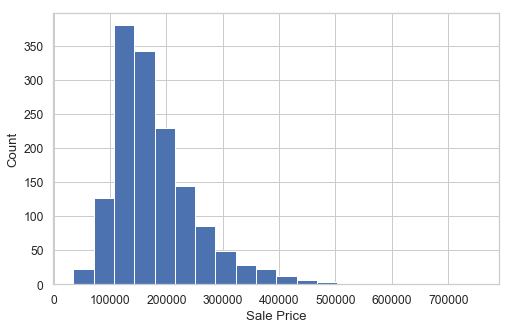

In [54]:
sns.distplot( housing['SalePrice'], norm_hist=False, kde=False, bins=20,
            hist_kws={"alpha": 1}).set(xlabel='Sale Price', ylabel='Count');

Taking a look at the histagram above we can see that very few houses are priced below 100,000, most of the houses are sold between 100k and 200k. And very few houses are sold for above 400k.

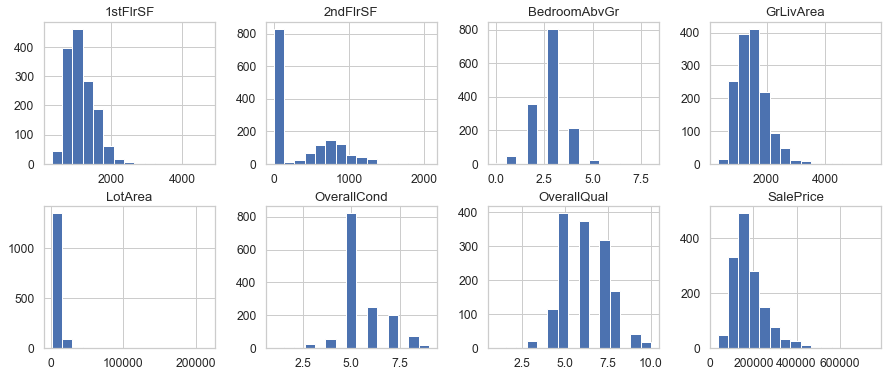

In [55]:
#big picture view of all our numerical variables of interest
housing[numerical].hist(bins=15, figsize=(15,6), layout=(2,4));

From this visualization, we get alot of info. We can see that 1stFlrSF is heavily skewed right, most houses do not have a second floor, and have 3 BedroomABvGr. Most houses we sold at an OverallCond of 5 and and OverallQual of 5 or higher. The LotArea visual is more difficult to decifer but we can tell there are one or more outliers that may need to be removed before any modeling. 

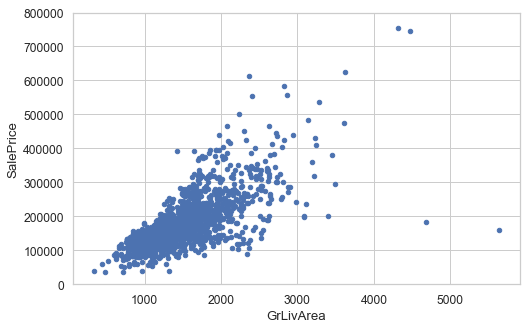

In [56]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Analysing Categorical Variables

Categirucal variables are best understood with bar plots. 

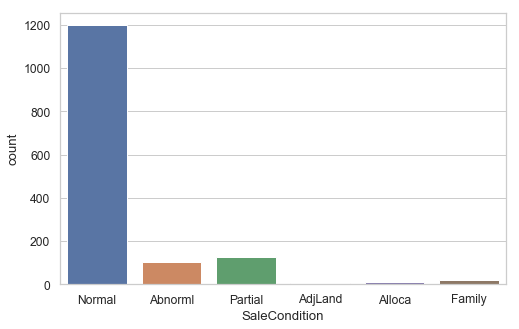

In [57]:
sns.countplot(housing['SaleCondition']);

From the visualization, we can easily see that most houses were sold in Normal condition, and very few were sold in ajdLand, and similar insights for the following categorical variables.  

Now in order to vizualize all the categorical vaiables in our dataset, just as we did with the numerical variables, we can loop through pandas seris to create subplots.

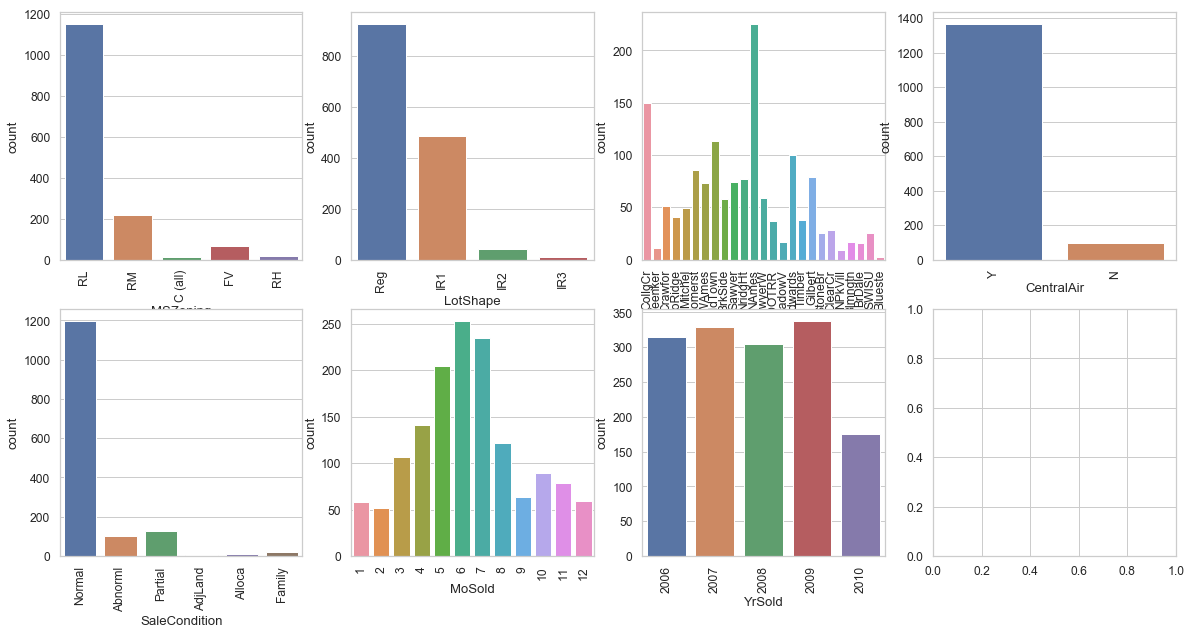

In [73]:
#For line 1 I had to add pyplot for it to run properly
fig, ax = plt.pyplot.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [75]:
housing[housing['YrSold']==2010].groupby('MoSold')['YrSold'].count()

MoSold
1    10
2    15
3    21
4    39
5    48
6    36
7     6
Name: YrSold, dtype: int64

By inspecting this variable more closely we find that thre was a dip in 2010 because no data was collected after July of that year. 

# Now onward to Analyzing Relationships Between Numerical Variables

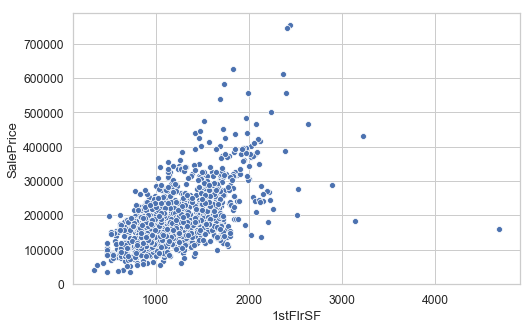

In [77]:
#The scatter plot is often used for vizualizing relationships between two numerical variables
sns.scatterplot(x=housing['1stFlrSF'], y=housing['SalePrice']);

In [ ]:
#WE can beef this plot up with some marginal plots through the use of 